In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\takea\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Excel 파일을 읽어 데이터프레임으로 저장
data = pd.read_excel(r'C:\Users\takea\Desktop\DL\datasets\week2\Raisin_Dataset\Raisin_Dataset.xlsx', 
        sheet_name='Raisin_Grains_Dataset')
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [48]:
data.drop(columns=['Area', 'MajorAxisLength', 'perimeter'], inplace=True)

KeyError: "['perimeter'] not found in axis"

In [5]:
# 데이터프레임을 숫자로 변경
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Class'] = label.fit_transform(data['Class'])
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


# 데이터 타입, 결측값, 컬럼 확인

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [13]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [9]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


# EDA 수행

Text(0.5, 1.0, 'Label')

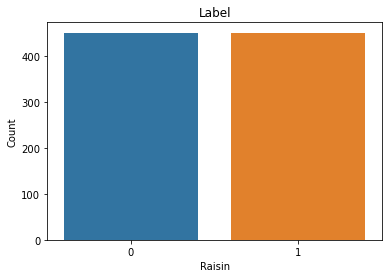

In [15]:
sns.countplot(data = data, x="Class")
plt.xlabel("Raisin")
plt.ylabel("Count")
plt.title("Label")

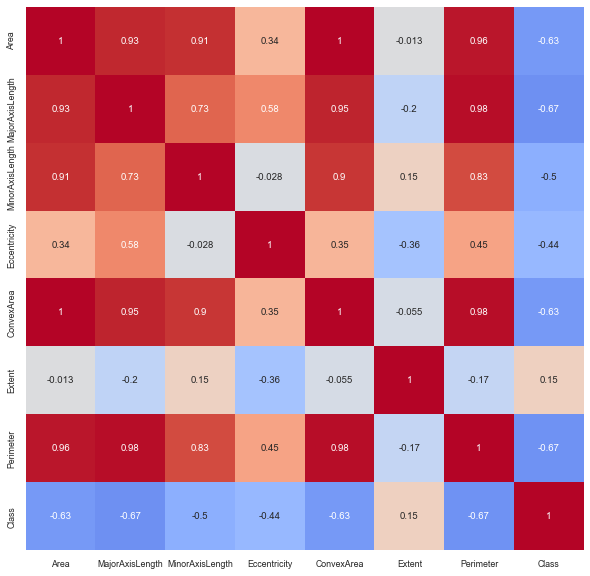

In [16]:
df_corr = data.astype(float).corr()
colormap = plt.cm.coolwarm
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap=colormap, vmin=-1., vmax=1.)
plt.show()

In [40]:
#Splitting the data into training and test test
X = data.iloc[:,0:6].values
y = data.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [41]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, 8.19738392e-01,
        9.05460000e+04, 7.58650579e-01],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, 8.01805234e-01,
        7.87890000e+04, 6.84129570e-01],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, 7.98353619e-01,
        9.37170000e+04, 6.37612812e-01],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, 7.21684066e-01,
        1.06264000e+05, 7.41098519e-01],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, 8.45738510e-01,
        9.76530000e+04, 6.58798253e-01],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, 9.07345395e-01,
        8.91970000e+04, 6.32019963e-01]])

In [42]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# 다중분류

model = Sequential()

model.add(Dense(5,input_shape=(6,),activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=1e-4),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 5)                 35        
                                                                 
 dense_33 (Dense)            (None, 5)                 30        
                                                                 
 dense_34 (Dense)            (None, 5)                 30        
                                                                 
 dense_35 (Dense)            (None, 2)                 12        
                                                                 
Total params: 107 (428.00 Byte)
Trainable params: 107 (428.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
20/20 [==============================] - 3s 24ms/step - loss: 6385.5513 - accuracy: 0.5032 - val_loss: 6273.6235 - val_accuracy: 0.4926
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 6190.8716 - accuracy: 0.5032 - val_loss: 6087.3242 - val_accuracy: 0.4926
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 6007.5479 - accuracy: 0.5032 - val_loss: 5900.4370 - val_accuracy: 0.4926
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 5824.1689 - accuracy: 0.5032 - val_loss: 5723.9438 - val_accuracy: 0.4926
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 5649.6665 - accuracy: 0.5032 - val_loss: 5549.8735 - val_accuracy: 0.4926
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 5477.1143 - accuracy: 0.5032 - val_loss: 5384.6138 - val_accuracy: 0.4926
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 5312.1885 - accuracy: 0.5032 - val_loss: 522

20/20 [==============================] - 0s 8ms/step - loss: 1164.8154 - accuracy: 0.5032 - val_loss: 1142.7964 - val_accuracy: 0.4926
Epoch 57/100
20/20 [==============================] - 0s 12ms/step - loss: 1126.7211 - accuracy: 0.5032 - val_loss: 1105.9924 - val_accuracy: 0.4926
Epoch 58/100
20/20 [==============================] - 0s 9ms/step - loss: 1090.9084 - accuracy: 0.5032 - val_loss: 1068.1152 - val_accuracy: 0.4926
Epoch 59/100
20/20 [==============================] - 0s 8ms/step - loss: 1053.4747 - accuracy: 0.5032 - val_loss: 1033.8582 - val_accuracy: 0.4926
Epoch 60/100
20/20 [==============================] - 0s 7ms/step - loss: 1018.7982 - accuracy: 0.5032 - val_loss: 999.4476 - val_accuracy: 0.4926
Epoch 61/100
20/20 [==============================] - 0s 8ms/step - loss: 984.3704 - accuracy: 0.5032 - val_loss: 965.1309 - val_accuracy: 0.4926
Epoch 62/100
20/20 [==============================] - 0s 9ms/step - loss: 950.7950 - accuracy: 0.5032 - val_loss: 931.6865 - va

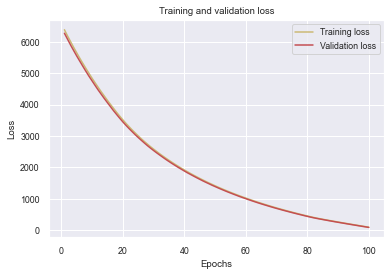

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

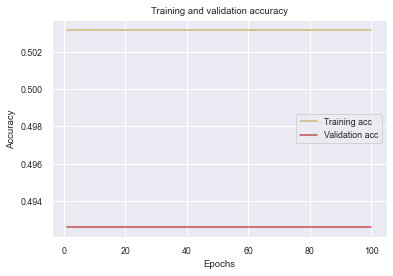

In [46]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.49      1.00      0.66       133

    accuracy                           0.49       270
   macro avg       0.25      0.50      0.33       270
weighted avg       0.24      0.49      0.33       270

[[  0 137]
 [  0 133]]
